In [1]:
from project_heart.lv import LV
import numpy as np
import pyvista as pv
import logging

pv.set_jupyter_backend("pythreejs")

import os
from pathlib import Path

from project_heart.enums import *

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")
# filepath = Path("C:/Users/igornobrega/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")

# Create speckles

In [3]:
lv = LV.from_file(filepath, log_level=logging.DEBUG)
lv.identify_regions(LV_GEO_TYPES.IDEAL,
    apex_base_args={"ab_ql":0.03, "ab_qh":0.90},
    endo_epi_args={"threshold":85,})
lv.plot("mesh", 
        scalars=LV_MESH_DATA.SURFS,
        container="points",
        show_edges=True,
        categorical=True,
        split_sharp_edges=True,
        smooth_shading=False,
        pretty=False,
        vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
        )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

Create Longitudinal Speckles

In [4]:
import logging

for i, a in enumerate(np.linspace(0, np.pi, 6, endpoint=False)):
    
    spk = lv.create_speckles(
        collection="long-6",
        group="endo",
        name=str(i),
        from_nodeset=LV_SURFS.ENDO,
        exclude_nodeset=LV_SURFS.BASE, # does not afect ideal case
        d=1.75,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="long-6",
        group="epi",
        name=str(i),
        from_nodeset=LV_SURFS.EPI,
        exclude_nodeset=LV_SURFS.BASE, # does not afect ideal case
        d=2.4,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("long-6", spk_collection="long-6")
lv.plot(
    scalars="long-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Speckle: name: 0, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 0, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 1, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 1, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 2, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 2, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 3, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 3, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 4, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 4, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 5, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 5, group: epi, collection: long-6


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

In [5]:
import logging
names = ["subapex", "apex", "superapex", "submid", "mid", "supermid", "subbase", "base", "superbase"]

for i, a in enumerate(np.linspace(0.1, 1.0, len(names), endpoint=False)):
    
    spk = lv.create_speckles(
        collection="circ-6",
        group="endo",
        name=names[i],
        from_nodeset=LV_SURFS.ENDO,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="circ-6",
        group="epi",
        name=names[i],
        from_nodeset=LV_SURFS.EPI,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("circ-6", spk_collection="circ-6")
lv.plot(
    scalars="circ-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Speckle: name: subapex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: subapex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: apex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: apex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: superapex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: superapex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: submid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: submid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: mid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: mid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: supermid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: supermid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: subbase, group: endo, collection: circ-6
INFO:create_spe

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

# Metrics

## Geo Metrics (formely geochars)

Volume:

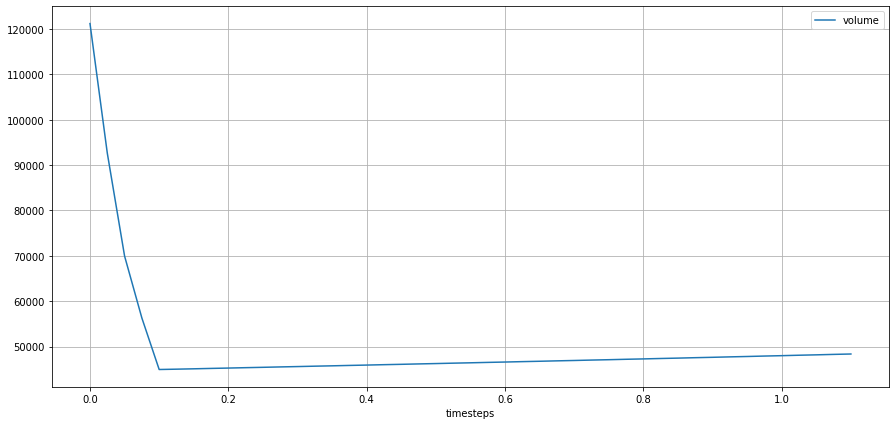

In [6]:
lv.volume()
lv.plot_metric(lv.STATES.VOLUME, kind="line")

Longitudinal Distances:

INFO:LV.BaseMetricsComputations:State key added:'longitudinal_distance_1'
INFO:LV.BaseMetricsComputations:State key added:'longitudinal_distance_2'


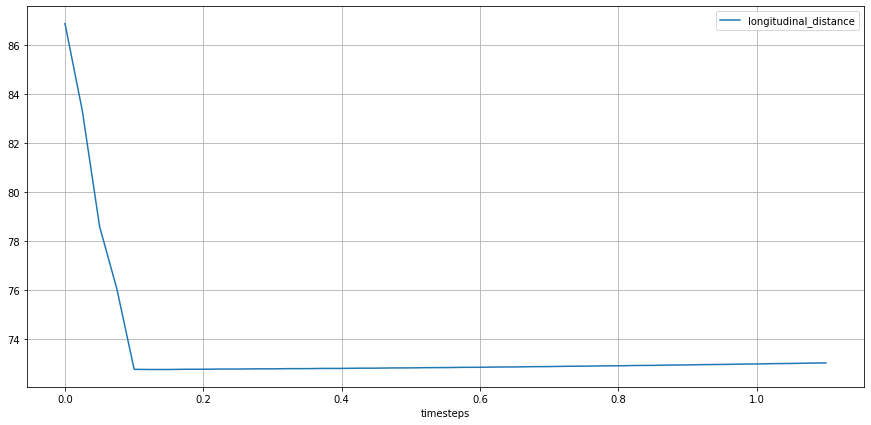

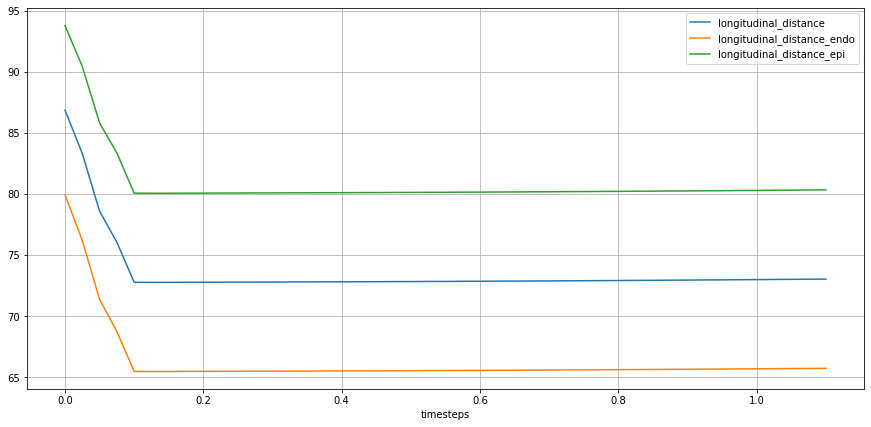

In [7]:
lv.longitudinal_distances()
lv.plot_metric(lv.STATES.LONG_DISTS, kind="line", search_suffix={lv.REGIONS.ENDO, lv.REGIONS.EPI})

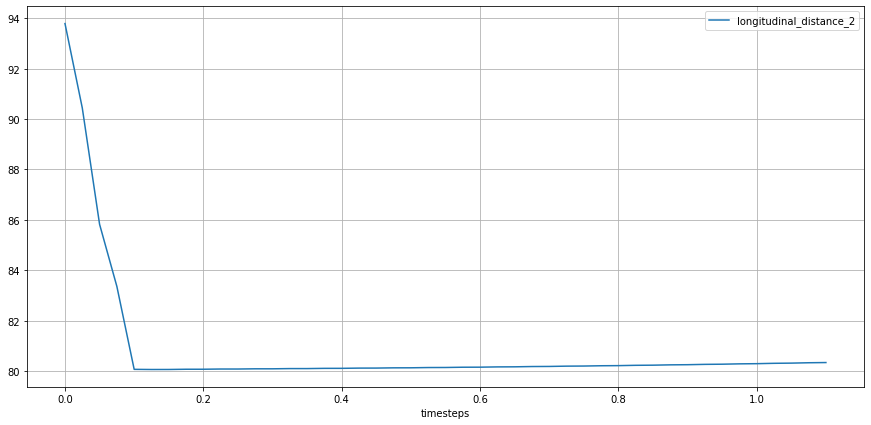

In [8]:
lv.plot_metric("longitudinal_distance_2", kind="line")

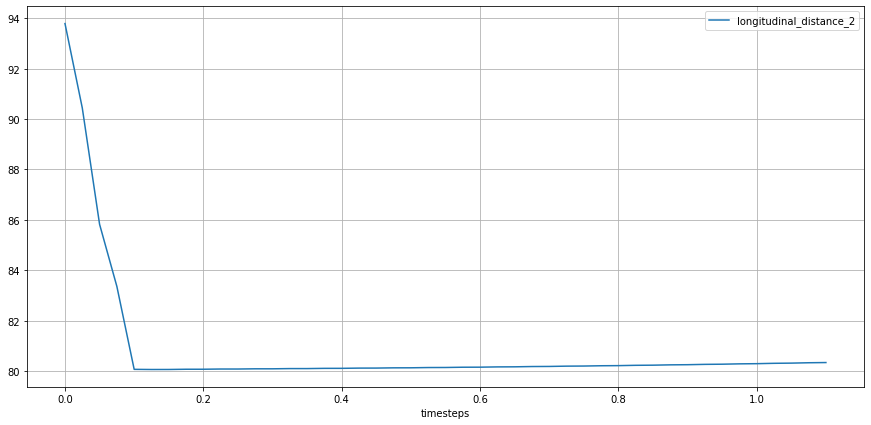

In [9]:
lv.plot_metric("longitudinal_distance_2", kind="line")

### Geo Metrics that do require speckles:

Radius (for each spk):

Expected values for radius at base: 

* EPI: 35
* ENDO: 25
* AVG: 30

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIUS'
DEBUG:LV.BaseMetricsComputations:Computing speckle radius for spk: '<Speckle: .subset: 0, .name: subapex, .group: endo, .collection: circ-6, .t: 0.0>'
DEBUG:LV.BaseMetricsComputations:-k: '0.1'
-apex:'[[-4.25903949e-02 -3.19000715e-03 -7.37867626e+01]
 [ 3.29903923e-02  1.21529605e-01 -7.04370358e+01]
 [-4.09859488e-01  2.10972460e-01 -6.58182382e+01]
 [-6.75200681e-01  3.60056853e-01 -6.33473224e+01]
 [-5.56049890e-01  5.34302826e-01 -6.00581336e+01]
 [-5.56288523e-01  5.34007486e-01 -6.00518318e+01]
 [-5.56639724e-01  5.34546600e-01 -6.00527301e+01]
 [-5.56630026e-01  5.35257544e-01 -6.00620808e+01]
 [-5.57072245e-01  5.35929206e-01 -6.00621578e+01]
 [-5.57128288e-01  5.36741837e-01 -6.00709042e+01]
 [-5.57639538e-01  5.37534676e-01 -6.00707525e+01]
 [-5.57746739e-01  5.38440937e-01 -6.00793443e+01]
 [-5.58317363e-01  5.39346305e-01 -6.00792958e+01]
 [-5.58470272e-01  5.40341018e-01 -6.00879862e+01]
 [-5.59096136e-01

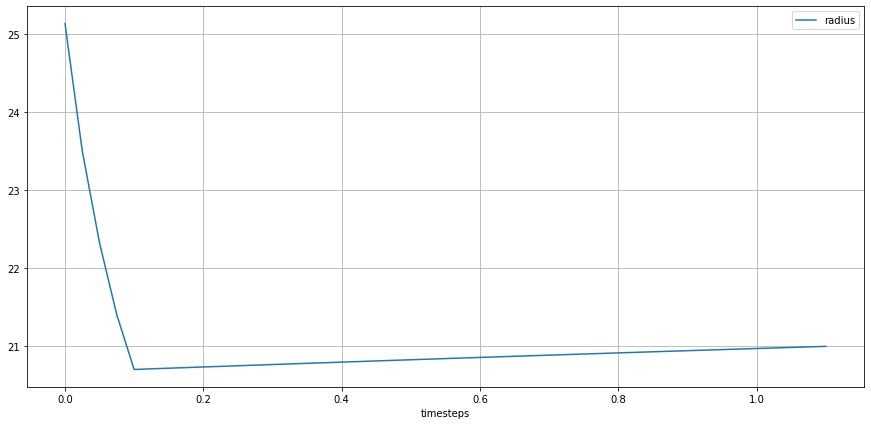

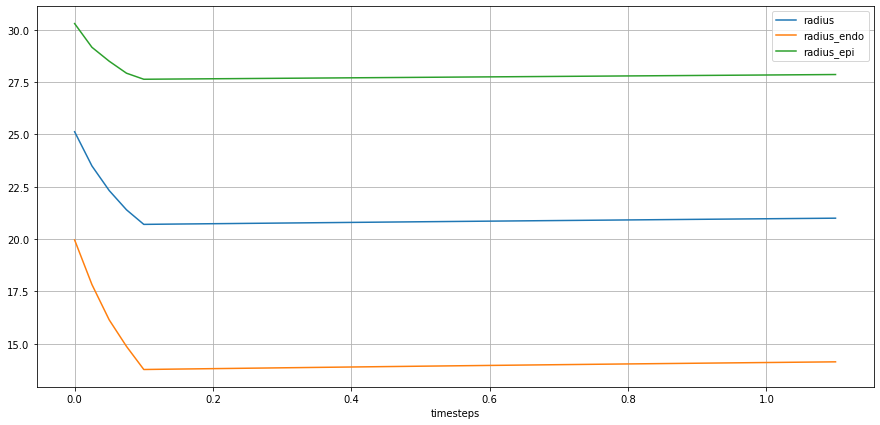

In [10]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
lv.radius(circ_spks, recompute=True, log_level=logging.DEBUG)
lv.plot_metric(lv.STATES.RADIUS, 
    from_ts=0.0, plot_infos=["group"])

Thickness

Expected: 10

In [ ]:
endo_circ_spks = lv.get_speckles(spk_name="base", spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_name="base", spk_group="epi", spk_collection="circ-6")

lv.thickness(endo_circ_spks, epi_circ_spks)
lv.plot_metric(lv.STATES.THICKNESS, from_ts=0.0, plot_infos={'group'})

Longitudinal Length:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.LONG_LENGTH'
DEBUG:LV.BaseMetricsComputations:res_group.keys() 'dict_keys([('endo', '0'), ('epi', '0'), ('endo', '1'), ('epi', '1'), ('endo', '2'), ('epi', '2'), ('endo', '3'), ('epi', '3'), ('endo', '4'), ('epi', '4'), ('endo', '5'), ('epi', '5')])'
DEBUG:LV.BaseMetricsComputations:res_by_name.keys() 'dict_keys(['0', '1', '2', '3', '4', '5'])'
DEBUG:LV.BaseMetricsComputations:res_by_group.keys() 'dict_keys(['endo', 'epi'])'
DEBUG:LV.BaseMetricsComputations:Reducing metric by name for 'LV_STATES.LONG_LENGTH'
DEBUG:LV.BaseMetricsComputations:namekey '0''
DEBUG:LV.BaseMetricsComputations:statekey 'longitudinal_length_0''
DEBUG:LV.BaseMetricsComputations:namekey '1''
DEBUG:LV.BaseMetricsComputations:statekey 'longitudinal_length_1''
DEBUG:LV.BaseMetricsComputations:namekey '2''
DEBUG:LV.BaseMetricsComputations:statekey 'longitudinal_length_2''
DEBUG:LV.BaseMetricsComputations:namekey '3''
DEBUG:LV.BaseMetricsComputations:statekey

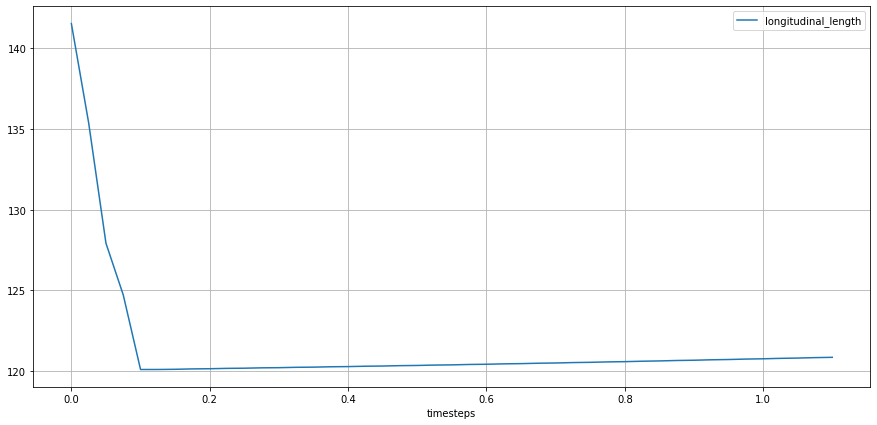

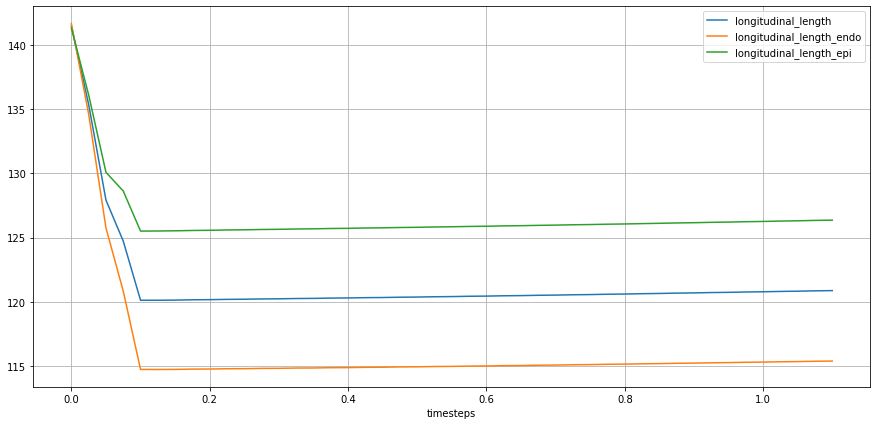

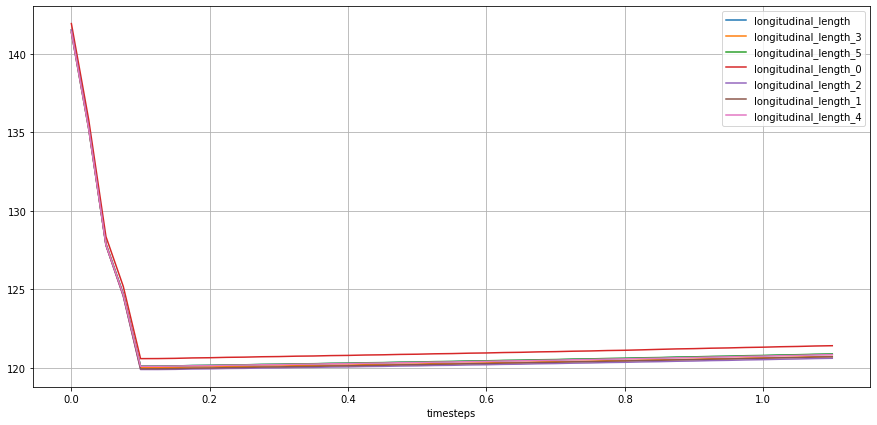

In [ ]:
long_spks = lv.get_speckles(spk_collection="long-6")
lv.longitudinal_length(long_spks, recompute=True, reduce_by={"group", "name"},
                                           mfilter_ws=0,
                                           sfilter_ws=0,
                                           sfilter_or=0,
                                           )
lv.plot_metric(lv.STATES.LONG_LENGTH, 
    from_ts=0.0,
    plot_infos=["group", "name"])

Circumferential Length:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.CIRC_LENGTH'
DEBUG:LV.BaseMetricsComputations:res_group '{('endo', 'subapex'): deque([array([32.30481768, 30.90319824, 26.90979528, 26.48511291, 22.58241677,
       22.59274483, 22.60432339, 22.61762142, 22.62893963, 22.64203691,
       22.65320992, 22.66618657, 22.67727399, 22.69017339, 22.70120406,
       22.71404362, 22.72503352, 22.7378242 , 22.74877501, 22.76151776,
       22.77243209, 22.78512192, 22.79599786, 22.80863094, 22.81946445,
       22.83203745, 22.8428216 , 22.85532618, 22.86605811, 22.87849236,
       22.88916349, 22.9015193 , 23.04702187, 23.05940485, 23.10759974,
       22.41068769, 22.42106843, 22.43302536, 22.44332242, 22.45517349,
       22.46538258, 22.4771235 , 22.88566804, 22.89773941, 22.9081018 ])]), ('epi', 'subapex'): deque([array([92.84899139, 91.53064537, 90.38614845, 89.29452229, 88.83447552,
       88.8372221 , 88.84617615, 88.86307812, 88.87140846, 88.88798523,
       88.89629936, 88.91301155

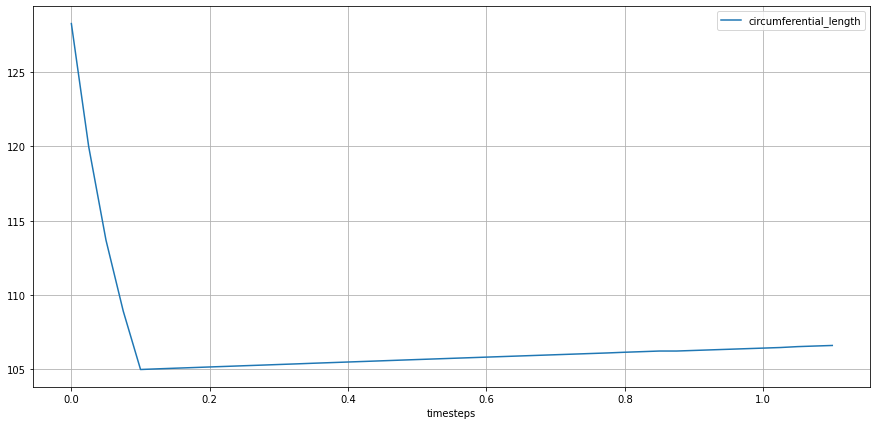

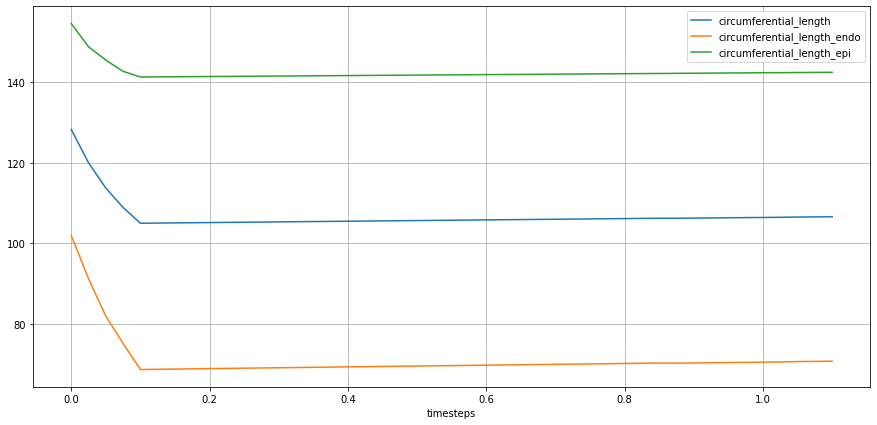

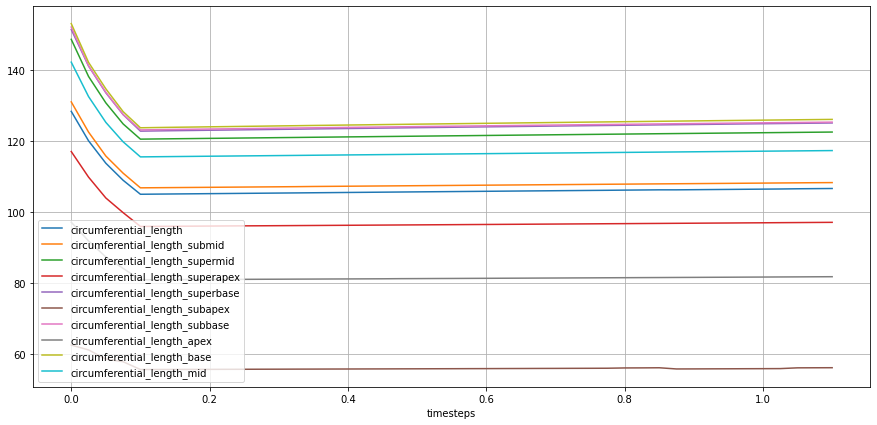

In [ ]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.circumferential_length(circ_spks, recompute=True, reduce_by={"group", "name"})
lv.plot_metric(lv.STATES.CIRC_LENGTH, 
    from_ts=0.0,
    plot_infos=["group", "name"])

Rotation:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.ROTATION'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (44, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 44, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (52, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 52, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (44, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 44, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (48, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 48, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (52, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 52, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.B

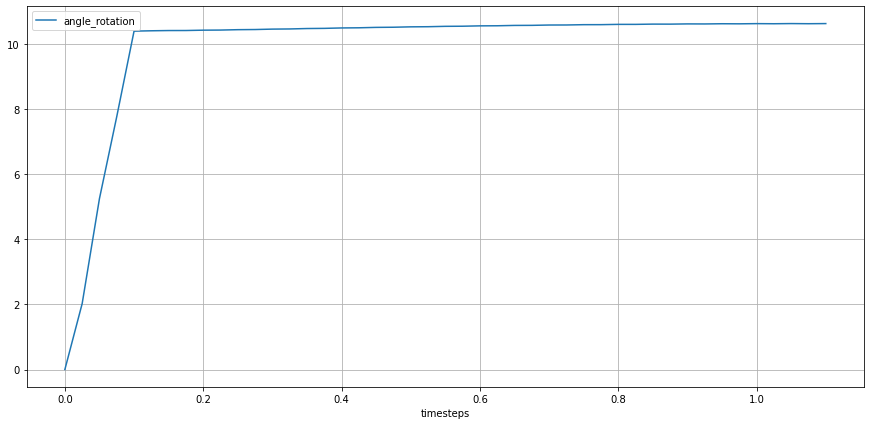

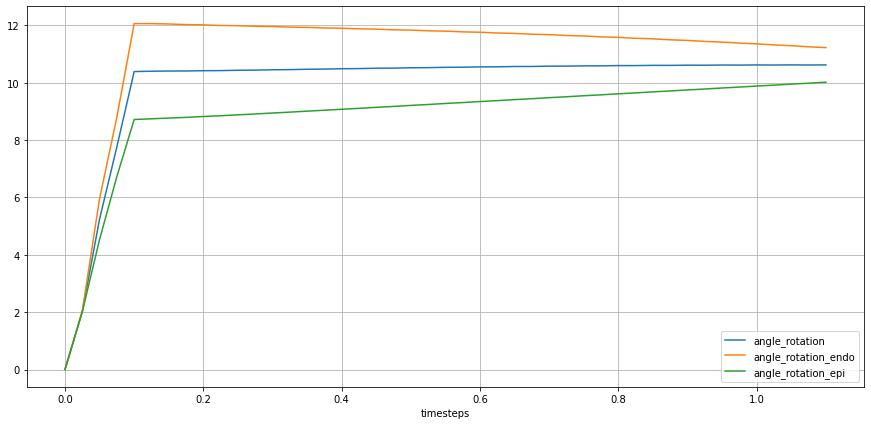

In [ ]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
lv.rotation(circ_spks, recompute=True, check_orientation=False)
lv.plot_metric(lv.STATES.ROTATION, 
    from_ts=0.0,
    plot_infos=["group"])

## Clinical Metrics:

### Clinical metrics that do not require speckles

Ejection Fraction

In [ ]:
# lv.ejection_fraction()
# lv.plot_metric(lv.STATES.EF, 
#     from_ts=0.1,
#     plot_infos=["group"])

Longitudinal Shortening:

In [ ]:
# lv.longitudinal_shortening()
# lv.plot_metric(lv.STATES.LS, 
#     from_ts=0.1,
#     plot_infos=["group"])

### Clinical metrics that require speckles

Radial shortening


INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIUS'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_SHORTENING'


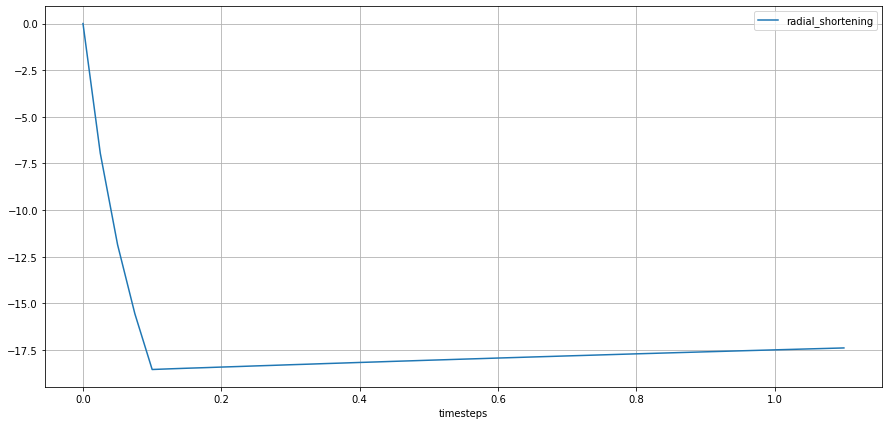

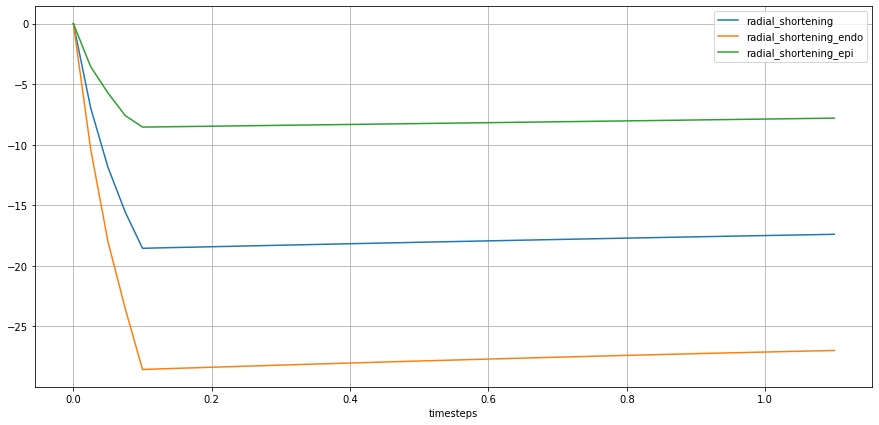

In [ ]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.radial_shortening(circ_spks, t_ed=0.0, recompute=True)
lv.plot_metric(lv.STATES.RS, 
    from_ts=0.0,
    plot_infos=["group"])

Wall thickening:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.WALL_THICKNESS'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.WALL_THICKENING'


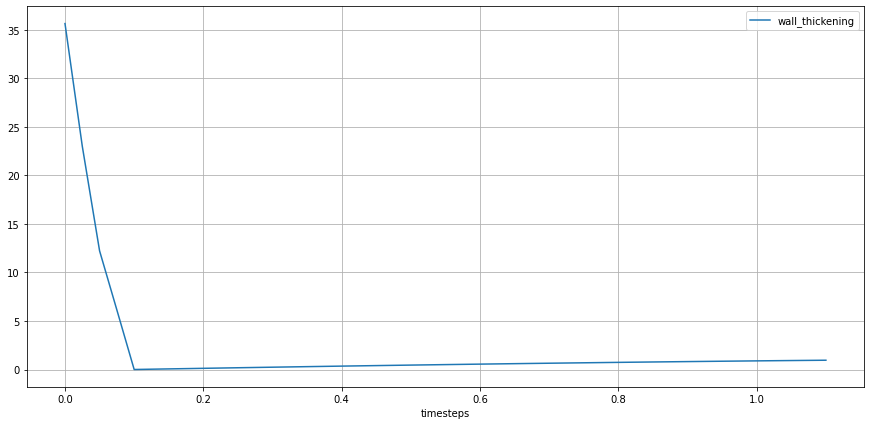

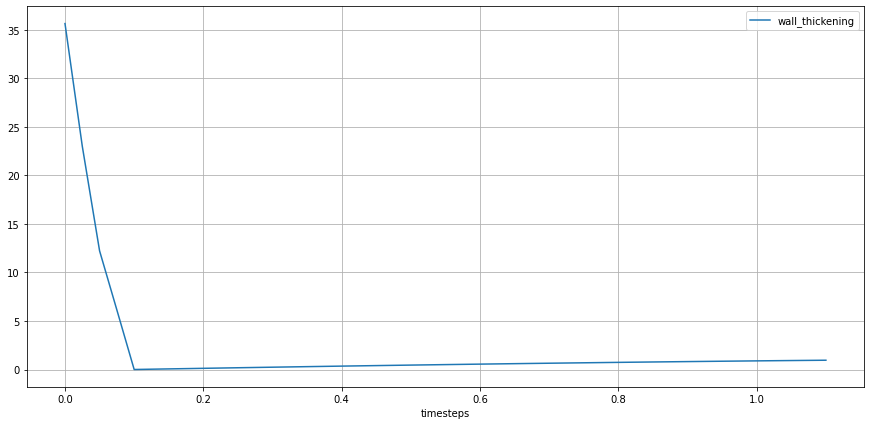

In [ ]:
endo_circ_spks = lv.get_speckles(spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_group="epi", spk_collection="circ-6")

lv.wall_thickening(endo_circ_spks, epi_circ_spks, t_ed=0.1, recompute=True)
lv.plot_metric(lv.STATES.WT, 
    from_ts=0.0,
    plot_infos=["group"])

Longitudinal strain:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.LONGITUDINAL_STRAIN'


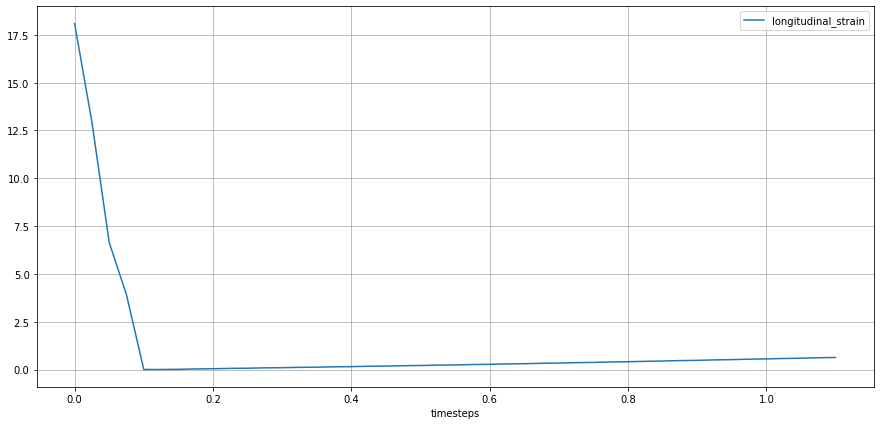

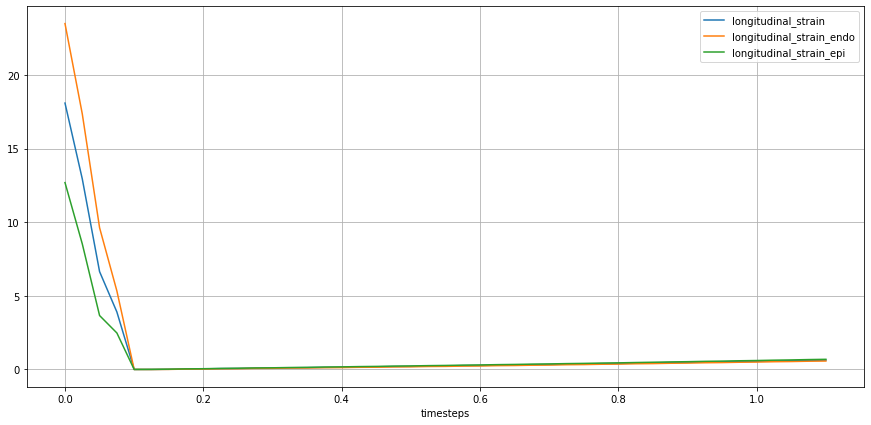

In [ ]:
long_spks = lv.get_speckles(spk_collection="long-6")
lv.longitudinal_strain(long_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.SL, 
    from_ts=0.0,
    plot_infos=["group"])

Circumferential Strain:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.CIRCUMFERENTIAL_STRAIN'


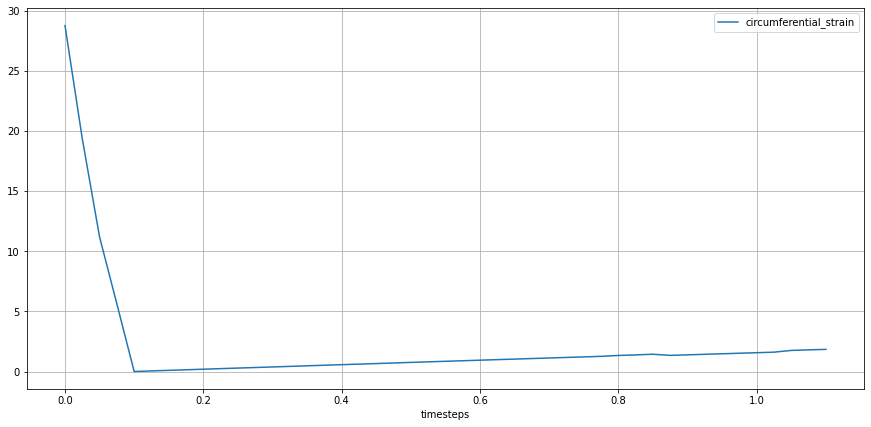

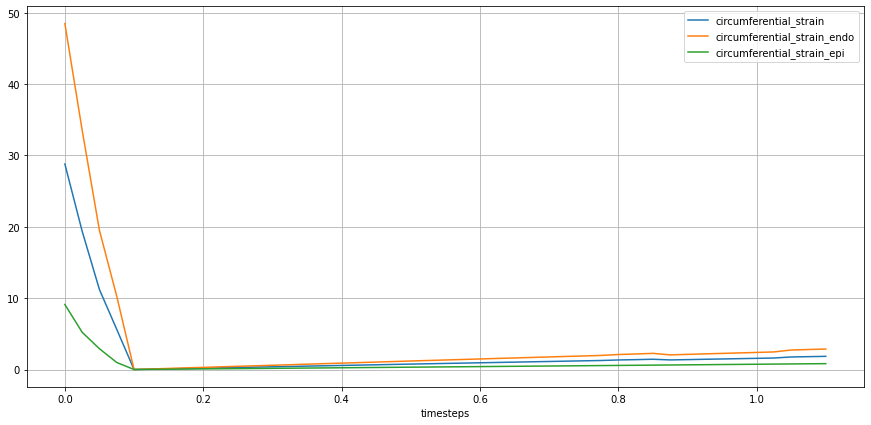

In [ ]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.circumferential_strain(circ_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.SC, 
    from_ts=0.0,
    plot_infos=["group"])

Twist:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.TWIST'


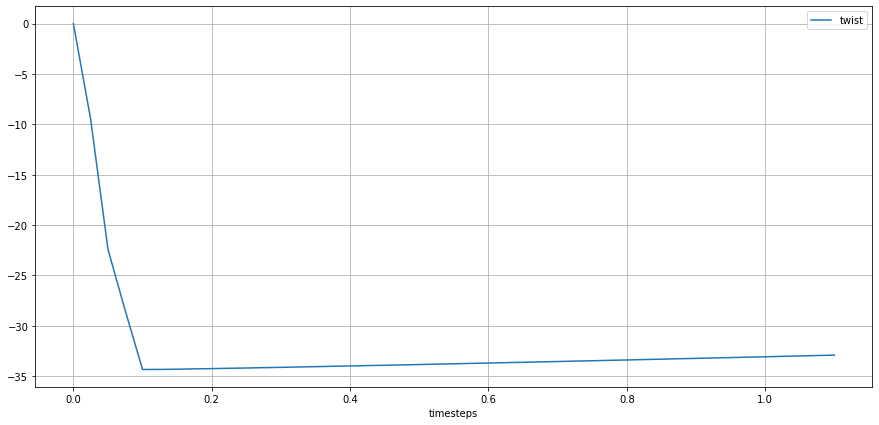

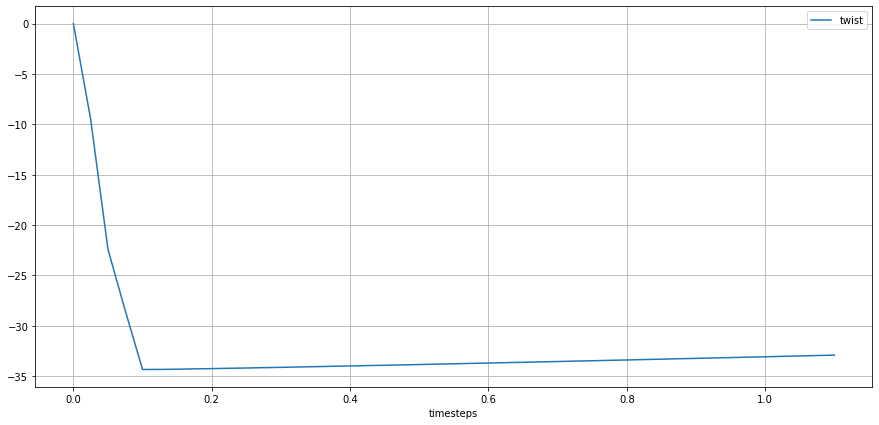

In [ ]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.twist(apex_spks, base_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.TW, 
    from_ts=0.0,
    plot_infos=["group"])

Torsion:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.TORSION'


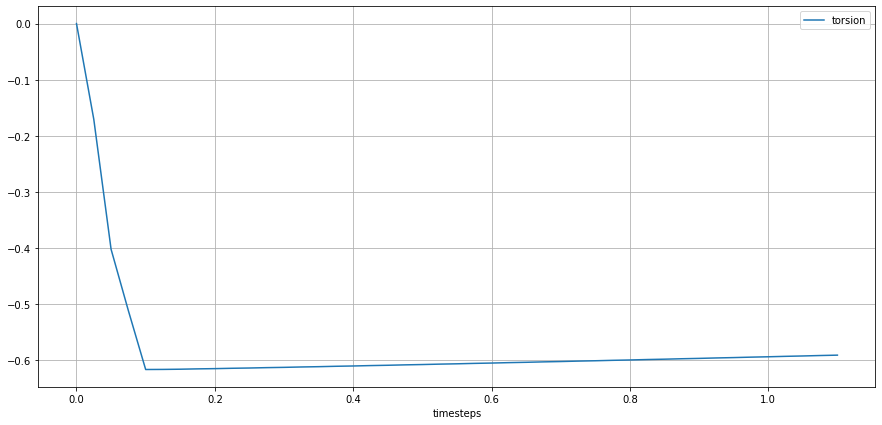

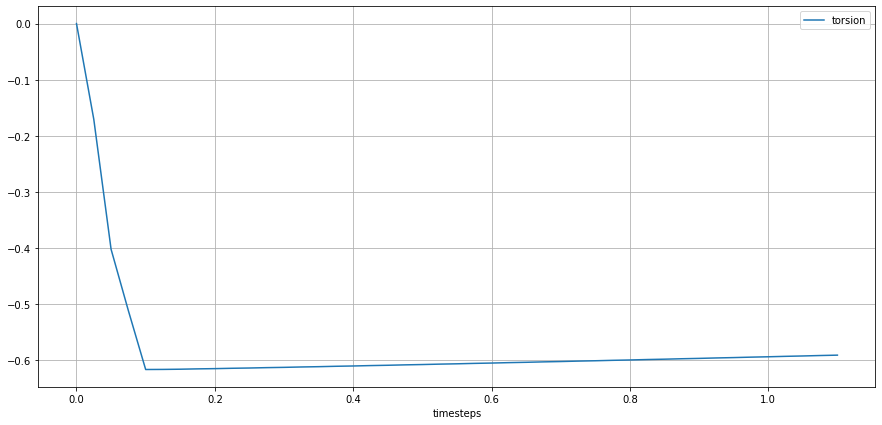

In [ ]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.torsion(apex_spks, base_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.TO, 
    from_ts=0.0,
    plot_infos=["group"])